**Missing Data Imputation:
Given the presence of 'NA' values in the dataset, design a model to predict and impute missing**

In [34]:
#import libraries

import pandas as pd
import numpy as np

#load dataset

df = pd.read_csv('weatherAUS.csv')

In [35]:
#check for the null value columns

df.columns[df.isna().any()].tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

**FOR NUMERICAL COLUMNS** -REPLACING MISSING VALUES WITH MEDIAN VALUES AS THE DATA IS NOT IN NORMAL DISTRIBUTION
**FOR CATEGORICAL COLUMNS** -USING SIMPLE IMPUTER TO REPLACE MISSING VALUES WITH MOST FREQUENT VALUES


In [36]:
#import libraries

from sklearn.impute import SimpleImputer

#list of columns that consists null values

li=['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

imputer = SimpleImputer(strategy = 'most_frequent')

#Filling the null values by median value to the numerical columns
#Filling the null values by mode value to the categorical columns


for i in li:
  if df[i].dtype.name != 'object':
    df[i] = df[i].fillna(df[i].median())
  else:
    missin_col = df[i]
    missin_col = pd.DataFrame(imputer.fit_transform(missin_col.values.reshape(-1,1)))
    df[i] = missin_col

**HANDLING CATEGORICAL VALUES**

In [37]:
# Import label encoder

from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.

label_encoder = preprocessing.LabelEncoder()

# Encode labels in columns.

df['WindGustDir']= label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am']= label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']= label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

**CHECKING FOR DUPLICATED VALUES**

In [38]:
df.duplicated().sum()

0

In [39]:
display(df.head())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,02-12-2008,Albury,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,03-12-2008,Albury,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,04-12-2008,Albury,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,05-12-2008,Albury,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [40]:
display(df.tail())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,21-06-2017,Uluru,2.8,23.4,0.0,4.8,8.4,0,31.0,9,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,22-06-2017,Uluru,3.6,25.3,0.0,4.8,8.4,6,22.0,9,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,23-06-2017,Uluru,5.4,26.9,0.0,4.8,8.4,3,37.0,9,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0
145458,24-06-2017,Uluru,7.8,27.0,0.0,4.8,8.4,9,28.0,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0
145459,25-06-2017,Uluru,14.9,22.6,0.0,4.8,8.4,13,39.0,2,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,0,0


In [41]:
df.shape

(145460, 23)

In [42]:
#check if still there exists null values in columns

df.columns[df.isna().any()].tolist()

[]

**VISUALIZATION OF OUTLIERS**

In [43]:
import plotly.express as px

In [44]:
fig = px.box(df,y="Rainfall",points="all")
fig.show()

In [45]:
fig = px.box(df,y="Sunshine",points="all")
fig.show()

In [46]:
fig = px.box(df,y="WindGustSpeed",points="all")
fig.show()

In [47]:
fig = px.box(df,y="Humidity3pm",points="all")
fig.show()

In [48]:
fig = px.box(df,y="Cloud3pm",points="all")
fig.show()

**OUTLIER DETECTION**

In [49]:
#Detecting outliers and removing the outliers

df_outliers = df
df_outliers.columns = df_outliers.columns
df_outliers.head()


#IQR(Inter Quartile Range)

Q1 = np.percentile(df_outliers['MinTemp'],25,
                   interpolation='midpoint')
Q3 = np.percentile(df_outliers['MinTemp'],75,
                   interpolation='midpoint')
IQR = Q3 - Q1

print("Old Shape: ",df_outliers.shape)

#Removing the Outliers
# Here outliers are absent so need no to remove

'''
#upper bound

upper = np.where(df_outliers['MinTemp'] >= (Q3+1.5*IQR))

#lower bound

lower = np.where(df_outliers['MinTemp'] <= (Q1+1.5*IQR))

# if present then

#df_outliers.drop(upper[0])
#df_outliers.drop(lower[0])'''

Old Shape:  (145460, 23)


<ipython-input-49-a6561ed790ae>:10: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

<ipython-input-49-a6561ed790ae>:12: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)



"\n#upper bound\n\nupper = np.where(df_outliers['MinTemp'] >= (Q3+1.5*IQR))\n\n#lower bound\n\nlower = np.where(df_outliers['MinTemp'] <= (Q1+1.5*IQR))\n\n# if present then\n\n#df_outliers.drop(upper[0])\n#df_outliers.drop(lower[0])"

**1. Rainfall Prediction:**
Develop a machine learning model to predict the 'RainTomorrow' label based on historical and
current weather metrics. The model should consider features such as temperature, humidity,
wind speed, and direction to forecast rainfall events.

**RANDOM FOREST ALGORITHM**

In [50]:
# Import necessary libraries

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)

X = df.drop(columns=['RainTomorrow','Location','Date'])

# Assuming 'RainTomorrow' is the target variable

y = df['RainTomorrow']

# Split the data into training and testing sets (adjust test_size as needed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest regressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

#fit the model

rf_model.fit(X_train, y_train)

# Make predictions on the test set

y_pred = rf_model.predict(X_test)

# Get feature importances

feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importances

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances

print(importance_df)

          Feature  Importance
12    Humidity3pm    0.266700
14    Pressure3pm    0.070139
6   WindGustSpeed    0.067829
0         MinTemp    0.049425
4        Sunshine    0.048065
11    Humidity9am    0.047886
13    Pressure9am    0.046969
2        Rainfall    0.046095
17        Temp9am    0.043073
1         MaxTemp    0.042591
18        Temp3pm    0.040677
10   WindSpeed3pm    0.036781
9    WindSpeed9am    0.034878
7      WindDir9am    0.030506
8      WindDir3pm    0.030344
5     WindGustDir    0.029592
3     Evaporation    0.029038
16       Cloud3pm    0.020513
15       Cloud9am    0.017451
19      RainToday    0.001448


In [51]:
top_n = 5  # Adjust the number of top features you want to select
selected_features = importance_df['Feature'][:top_n].tolist()

print(selected_features)

['Humidity3pm', 'Pressure3pm', 'WindGustSpeed', 'MinTemp', 'Sunshine']


In [52]:
# Filter the training and testing data to include only the selected features

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create and train a Random Forest regressor using the selected features

rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the model with selected features

y_pred_selected = rf_model_selected.predict(X_test_selected)

#importing libraries

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE) for the model with selected features

mae_selected = mean_absolute_error(y_test, y_pred_selected)
mse = mean_squared_error(y_test, y_pred_selected)
r2 = r2_score(y_test, y_pred_selected)

print(f'Mean Absolute Error (MAE) with selected features: {mae_selected}')
print(f'Mean Squared Error (MSE) with selected features: {mse}')
print(f'R-squared (R²)  with selected features: {r2}')

Mean Absolute Error (MAE) with selected features: 0.22991672181873715
Mean Squared Error (MSE) with selected features: 0.12110914059945702
R-squared (R²)  with selected features: 0.29579481376737593


**MULTI LINEAR REGRESSION MODEL**

In [53]:
#importing neccessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

# Define the target column and the feature columns

target_column = 'RainTomorrow'  # Replace with the name of your target column
X = df.drop(columns=[target_column,'Date','Location'])
y = df[target_column]

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest with f_regression as the scoring function

k_best = SelectKBest(score_func=f_regression, k=5)

 # You can adjust 'k' as needed

X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)
selected_mask = k_best.get_support()  # This will give you a boolean array
selected_columns = X.columns[selected_mask]

print("Selected Columns:")
print(selected_columns)

Selected Columns:
Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud3pm', 'RainToday'], dtype='object')


In [54]:
# Initialize and train the Linear Regression model

model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the test set

y_pred = model.predict(X_test_selected)

# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error: 0.13089474384390581
R-squared (R2): 0.2388951237766228


**GRADIENT BOOSTING ALGORITHM**

In [55]:
#importing necessary libraries

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Specify the target column you want to predict

target_column = 'RainTomorrow'

# Split the data into features (X) and the target variable (y)

X = df.drop(columns=[target_column,'Location','Date'])
y = df[target_column]

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier

xgb_model = xgb.XGBClassifier()

# Fit the model to the training data

xgb_model.fit(X_train, y_train)

# Get feature importance scores

feature_importance = xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance in descending order

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 'n' features based on importance (you can adjust 'n' as needed)

top_n_features = feature_importance_df.head(n=5)  # Select the top 5 features

# Get the names of the selected features

selected_features = top_n_features['Feature'].tolist()

# Print the selected features

print("Selected Features:")
print(selected_features)

Selected Features:
['Humidity3pm', 'WindGustSpeed', 'Sunshine', 'Rainfall', 'Pressure3pm']


In [56]:
# Train a new XGBoost model using only the selected features

xgb_model_selected = xgb.XGBClassifier()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

xgb_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the model with selected features

y_pred = xgb_model_selected.predict(X_test_selected)

# Evaluate the model's performance

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set with selected features: {accuracy:.2f}")

Accuracy on the test set with selected features: 0.84


**NOTE :**FROM THREE MODELS PERFORMED FOR RAINFALL PREDICTION, HIGHEST ACCURACY WAS IDENTIFIED IN **GRADIENT BOOSTING ALGORITHM**

**2. Feature Importance and Sensitivity Analysis:**
After training the rainfall prediction model, identify which weather metrics are the most influential
in predicting rainfall. Additionally, conduct a sensitivity analysis to understand how slight
changes in key metrics (e.g., 'Pressure 9am', 'Humidity 3pm') impact the prediction outcome

In [57]:
import numpy as np

# Define the selected features

selected_features = top_n_features['Feature'].tolist()

# Create a DataFrame to store sensitivity analysis results

sensitivity_analysis_df = pd.DataFrame(columns=['Attribute', 'Sensitivity', 'Change'])

# Define the range of values to vary for sensitivity analysis (e.g., -2 to 2)

value_range = np.linspace(-2, 2, num=11)

# Perform sensitivity analysis for each selected attribute

for attribute in selected_features:
    for change in value_range:
        # Copy the original test data to avoid modifying it

        X_test_sensitivity = X_test[selected_features].copy()

        # Vary the attribute value while keeping others constant

        X_test_sensitivity[attribute] += change

        # Make predictions using the model with selected features

        y_pred_sensitivity = xgb_model_selected.predict(X_test_sensitivity)

        # Calculate the sensitivity (change in prediction) for the target variable

        sensitivity = np.mean(y_pred_sensitivity != y_pred)

        # Append the results to the sensitivity analysis DataFrame

        new_row = pd.DataFrame({'Attribute': [attribute], 'Sensitivity': [sensitivity], 'Change': [change]})
        sensitivity_analysis_df = pd.concat([sensitivity_analysis_df, new_row], ignore_index=True)


# Print the sensitivity analysis results

print("Sensitivity Analysis Results:")
print(sensitivity_analysis_df)

Sensitivity Analysis Results:
        Attribute  Sensitivity  Change
0     Humidity3pm     0.018871    -2.0
1     Humidity3pm     0.018871    -1.6
2     Humidity3pm     0.018871    -1.2
3     Humidity3pm     0.012478    -0.8
4     Humidity3pm     0.012478    -0.4
5     Humidity3pm     0.000000     0.0
6     Humidity3pm     0.000000     0.4
7     Humidity3pm     0.000000     0.8
8     Humidity3pm     0.013646     1.2
9     Humidity3pm     0.013646     1.6
10    Humidity3pm     0.020590     2.0
11  WindGustSpeed     0.013818    -2.0
12  WindGustSpeed     0.013818    -1.6
13  WindGustSpeed     0.013818    -1.2
14  WindGustSpeed     0.012409    -0.8
15  WindGustSpeed     0.012409    -0.4
16  WindGustSpeed     0.000000     0.0
17  WindGustSpeed     0.000000     0.4
18  WindGustSpeed     0.000000     0.8
19  WindGustSpeed     0.001547     1.2
20  WindGustSpeed     0.001547     1.6
21  WindGustSpeed     0.012375     2.0
22       Sunshine     0.038602    -2.0
23       Sunshine     0.031830    

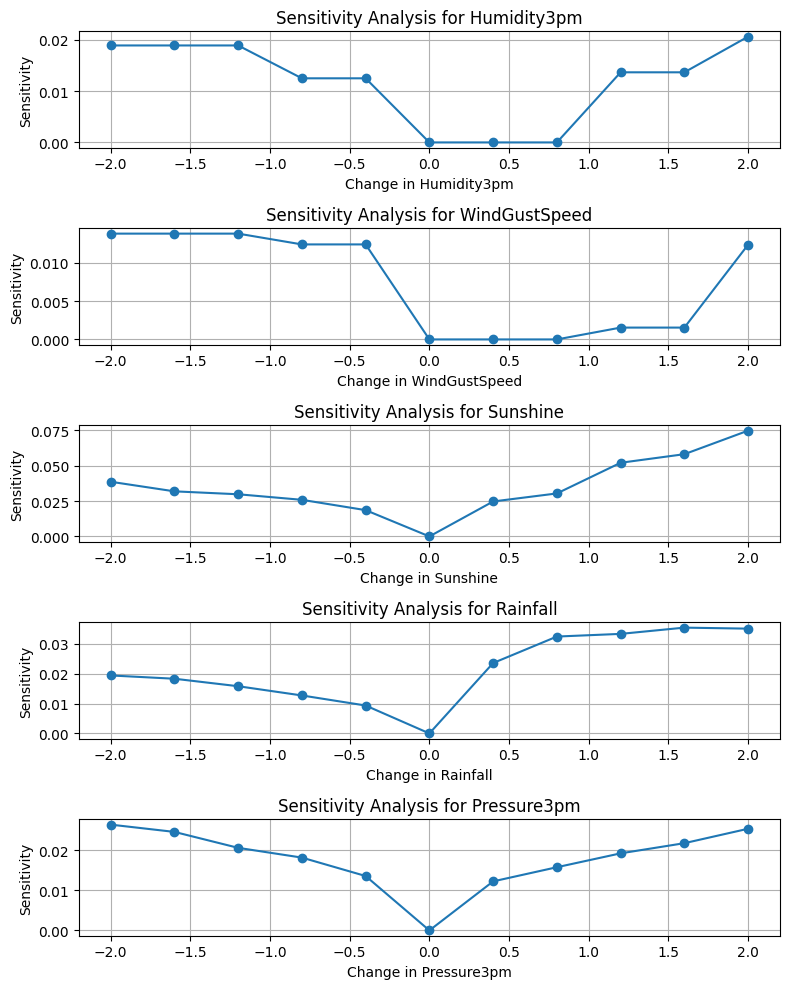

In [58]:
import matplotlib.pyplot as plt

# Group the sensitivity analysis results by attribute

grouped_results = sensitivity_analysis_df.groupby('Attribute')

# Create subplots for each attribute

fig, axes = plt.subplots(len(selected_features), figsize=(8, 10))

for i, attribute in enumerate(selected_features):
    ax = axes[i]
    attribute_data = grouped_results.get_group(attribute)

    # Plot sensitivity values vs. attribute changes

    ax.plot(attribute_data['Change'], attribute_data['Sensitivity'], marker='o', linestyle='-')
    ax.set_xlabel(f'Change in {attribute}')
    ax.set_ylabel('Sensitivity')
    ax.set_title(f'Sensitivity Analysis for {attribute}')
    ax.grid(True)

# Adjust subplot layout

plt.tight_layout()

# Show the plots

plt.show()

**NOTE :**FROM THE PLOTS ABOVE, WE CAN IDENTIFY HUMIDITY3PM, WINDGUSTSPEED HAVE HIGHEST IMPACT ON RAINFALL TOMORROW

**3. Anomaly Detection:**
Develop a model to detect anomalies in the weather data, such as sudden spikes in
temperature or unexpected drops in pressure, which might indicate extreme weather events or
data collection errors.

**VISUALIZING DATA FOR DETECTING ANOMALIES**

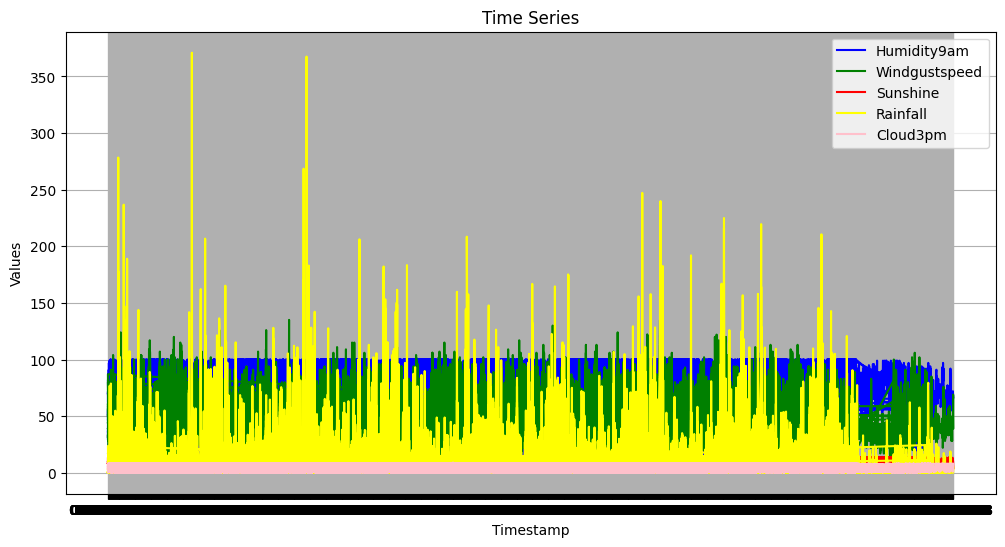

In [59]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have 'Humidity3pm', 'WindGustSpeed', 'Sunshine' ,'Rainfall' , 'Cloud3pm'

timestamp=df['Date']
humidity = df['Humidity9am']
windgustspeed= df['WindGustSpeed']
sunshine= df['Sunshine']
rainfall=df['Rainfall']
cloud=df['Cloud3pm']

# Plot the data

plt.figure(figsize=(12, 6))
plt.plot(timestamp, humidity, label='Humidity9am', color='blue')
plt.plot(timestamp, windgustspeed, label='Windgustspeed', color='green')
plt.plot(timestamp, sunshine, label='Sunshine', color='red')
plt.plot(timestamp, rainfall, label='Rainfall', color='yellow')
plt.plot(timestamp, cloud, label='Cloud3pm', color='pink')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Time Series')
plt.legend()
plt.grid(True)
plt.show()

**VISULIZING ANOMALIES**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



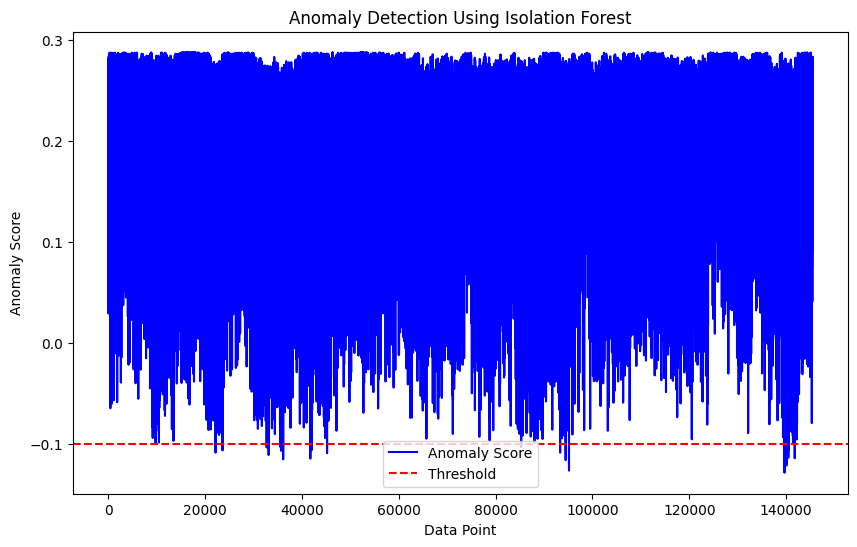

Detected Anomalies:
         timestamp  humidity  windgustspeed  sunshine  rainfall  cloud
22178   26-12-2011      98.0           80.0       0.0      84.8    8.0
23620   04-02-2016      97.0           61.0       3.6      73.8    1.0
32723   21-04-2015      87.0           87.0       0.0     119.4    8.0
33133   04-06-2016      91.0           89.0       0.0      64.4    8.0
33134   05-06-2016      89.0           96.0       0.0      93.8    8.0
35544   15-10-2014      79.0          102.0       0.1     106.8    7.0
35732   21-04-2015      84.0           96.0       0.0      88.6    8.0
35733   22-04-2015      99.0           89.0       0.6      72.8    7.0
36142   04-06-2016      95.0           98.0       0.0      72.0    8.0
36143   05-06-2016      91.0           83.0       0.0      95.6    8.0
41750   21-04-2015      88.0          113.0       0.0     156.0    8.0
42010   06-01-2016      95.0           80.0       0.0     225.0    8.0
45200   04-06-2016      92.0          102.0       8.4    

In [60]:
#importing libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

#creating a dataframe for the selected features

weather_df=pd.DataFrame({'timestamp':timestamp,'humidity':humidity,'windgustspeed':windgustspeed,'sunshine':sunshine,'rainfall':rainfall,'cloud':cloud})

# Initialize and train the Isolation Forest model

model = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination as needed
model.fit(weather_df[['humidity','windgustspeed','sunshine','rainfall','cloud']])

# Predict anomalies

anomaly_scores = model.decision_function(weather_df[['humidity','windgustspeed','sunshine','rainfall','cloud']])
threshold = -0.1  # Adjust the threshold as needed

# Create a DataFrame with anomaly scores and labels

anomaly_df = pd.DataFrame({'Anomaly Score': anomaly_scores, 'Anomaly Label': anomaly_scores < threshold})

# Visualize anomalies (plot anomaly scores)

plt.figure(figsize=(10, 6))
plt.plot(anomaly_scores, label='Anomaly Score', color='b')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Data Point')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection Using Isolation Forest')
plt.legend()
plt.show()

# Display the data points classified as anomalies

anomalies = weather_df[anomaly_scores < threshold]
print('Detected Anomalies:')
print(anomalies)

**4. Weather Pattern Clustering:**
Use unsupervised learning models to cluster days based on their weather profiles. Identify
patterns or groups of days with similar weather characteristics, which can be used for
comparative analysis and understanding seasonal variations.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



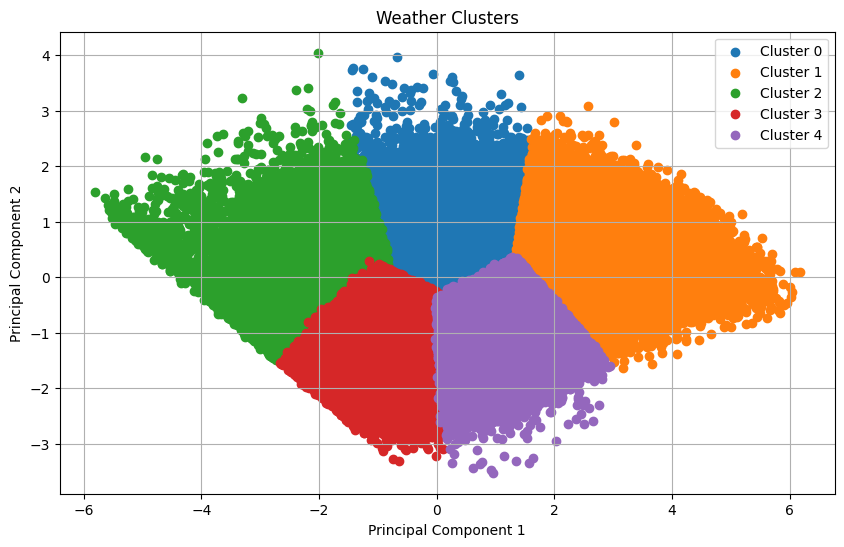

In [61]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have a DataFrame with features like  'Humidity9am', 'Humidity3pm', 'Temp9am','Temp3pm'.

selected_features = ['Humidity9am', 'Humidity3pm', 'Temp9am','Temp3pm']

# Create a subset DataFrame with selected features

weather_features = df[selected_features]

# Standardize the data (important for K-Means)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(weather_features)

# Determine the number of clusters (you may need to adjust this based on your data)

num_clusters = 5  # Adjust as needed

# Apply K-Means clustering

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the DataFrame

df['cluster'] = clusters

# Visualize the clusters (you may need to adapt this for your specific features)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = reduced_data[df['cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Weather Clusters')
plt.legend()
plt.grid(True)
plt.show()

**NOTE :**DATA IS DIVIDED INTO CLUSTERS OF SIMILAR WEATHER PATTERNS.

**6. Wind Pattern Analysis:**
- Model the relationship between different wind-related metrics ('WindGustDir',
'WindGustSpeed', 'WindDir9am', 'WindDir3pm') to predict potential gusty days which might have
implications for sectors like aviation and renewable energy.

**USING GRADIENT BOOST MODEL**

In [62]:
#import libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

threshold_speed = 40  # Example threshold, can be adjusted
df['GustyDay'] = df['WindGustSpeed'] > threshold_speed

X = df[['WindGustDir','WindDir9am','WindDir3pm']]
y = df['GustyDay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 64.41%


**USING RANDOM FOREST ALGORITHM**

In [63]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 61.43%


**NOTE-**GRADIENT BOOST ALGORITHM HAS BETTER ACCURACY THAN RANDOM FOREST

**7. Evaporation Rate Prediction:**
Using available metrics, develop a model to predict 'Evaporation' rates, assisting in water
resource management and agricultural planning.

**USING RANDOM FOREST ALGORITHM**

In [31]:
#import libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define features and target variable

X = df.drop(columns=['Evaporation','Date','Location'])
y = df['Evaporation']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regression model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set

y_pred = model.predict(X_test)

# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# Get feature importances

feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_n = 5  # Adjust the number of top features you want to select

selected_features = importance_df['Feature'][:top_n].tolist()
print(selected_features)

# Filter the training and testing data to include only the selected features

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create and train a Random Forest regressor using the selected features

rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the model with selected features

y_pred_selected = rf_model_selected.predict(X_test_selected)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE) for the model with selected features

mae_selected = mean_absolute_error(y_test, y_pred_selected)
mse = mean_squared_error(y_test, y_pred_selected)
r2 = r2_score(y_test, y_pred_selected)

print(f'Mean Absolute Error (MAE) with selected features: {mae_selected}')
print(f'Mean Squared Error  with selected features: {mse}')
print(f'R-squared (R²)  with selected features: {r2}')

Mean Absolute Error: 1.18
['MaxTemp', 'Sunshine', 'Humidity9am', 'Temp9am', 'MinTemp']
Mean Absolute Error (MAE) with selected features: 1.3538084984018646
Mean Squared Error  with selected features: 6.639165826980669
R-squared (R²)  with selected features: 0.34474891789925566


**USING GRADIENT BOOSTING ALGORITHM**

In [ ]:
#import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Splitting data into features and target

X = df.drop(["Evaporation","Date","Location"], axis=1)
y = df["Evaporation"]

# Splitting data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting model to get feature importances

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Get feature importance scores

feature_importance = model.feature_importances_

# Create a DataFrame to store feature names and their importance scores

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance in descending order

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 'n' features based on importance (you can adjust 'n' as needed)

top_n_features = feature_importance_df.head(n=5)  # Select the top 5 features

# Get the names of the selected features

selected_features = top_n_features['Feature'].tolist()

print(selected_features)

# Use only the selected features for training and testing

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train a Gradient Boosting model on the selected features

model_selected = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_selected.fit(X_train_selected, y_train)

# Evaluate the model on test data

predictions_selected = model_selected.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, predictions_selected)

print(f"Mean Squared Error with selected features: {mse_selected}")

**NOTE :**RANDOM FOREST ALGORITHM HAS LEAST MEAN SQUARED ERROR THAN GRADENT BOOSTING ALGORITHM

**8. Location-based Analysis:**
Segment and analyze weather patterns based on 'Location'. Predict how weather patterns might
vary across different locations and identify regions more prone to extreme weather events.


<Figure size 1200x600 with 0 Axes>

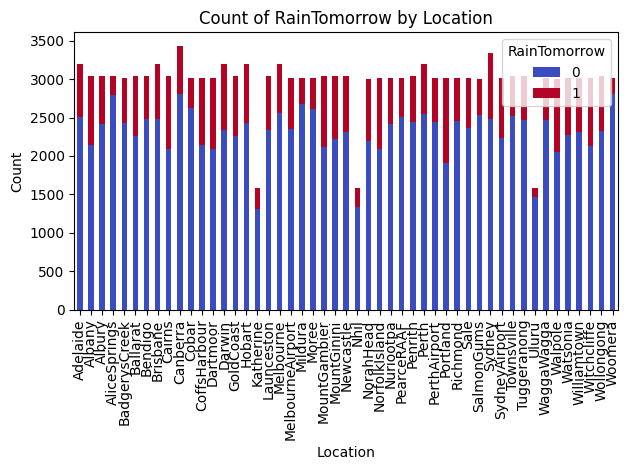

In [33]:
#import libraries

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the count of 'RainTomorrow' for each location

location_counts = df.groupby(['Location', 'RainTomorrow']).size().unstack(fill_value=0)

# Create a stacked bar chart

plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', stacked=True, colormap='coolwarm')

# Customize the plot

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of RainTomorrow by Location')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot

plt.show()